In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
sns.set(rc={'figure.figsize':(10, 8)})

    1. Загружаем датасеты

In [2]:
df1 = pd.read_csv('identity_small.csv', sep =',')
df1

,TransactionID,id_04,id_20,id_24,id_33,id_29,id_22,id_02
0,2987004,NaN,144.0,NaN,2220x1080,NotFound,NaN,70787.0
1,2987008,NaN,500.0,NaN,1334x750,NotFound,NaN,98945.0
2,2987010,0.0,142.0,NaN,NaN,Found,NaN,191631.0
3,2987011,NaN,507.0,NaN,NaN,NotFound,NaN,221832.0
4,2987016,0.0,575.0,NaN,1280x800,Found,NaN,7460.0
...,...,...,...,...,...,...,...,...
144228,3577521,0.0,139.0,NaN,NaN,Found,NaN,145955.0
144229,3577526,NaN,333.0,NaN,855x480,NotFound,NaN,172059.0
144230,3577529,NaN,411.0,NaN,NaN,NotFound,NaN,632381.0
144231,3577531,0.0,368.0,NaN,2560x1600,Found,NaN,55528.0


In [3]:
df2 = pd.read_csv('trans_small.csv', sep =',')
df2

,TransactionID,D4,card1,card2,card3,addr1,addr2,TransactionAmt,isFraud,C13,...,V225,V277,V243,V40,V46,V244,V274,V73,V147,M5
0,2987000,NaN,13926,NaN,150.0,315.0,87.0,68.50,0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,F
1,2987001,0.0,2755,404.0,150.0,325.0,87.0,29.00,0,1.0,...,NaN,NaN,NaN,0.0,1.0,NaN,NaN,0.0,NaN,T
2,2987002,0.0,4663,490.0,150.0,330.0,87.0,59.00,0,1.0,...,NaN,NaN,NaN,0.0,1.0,NaN,NaN,0.0,NaN,F
3,2987003,94.0,18132,567.0,150.0,476.0,87.0,50.00,0,25.0,...,NaN,NaN,NaN,0.0,1.0,NaN,NaN,0.0,NaN,T
4,2987004,NaN,4497,514.0,150.0,420.0,87.0,50.00,0,1.0,...,0.0,0.0,1.0,NaN,NaN,1.0,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,NaN,6550,NaN,150.0,272.0,87.0,49.00,0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,T
590536,3577536,0.0,10444,225.0,150.0,204.0,87.0,39.50,0,1.0,...,NaN,NaN,NaN,0.0,1.0,NaN,NaN,0.0,NaN,F
590537,3577537,0.0,12037,595.0,150.0,231.0,87.0,30.95,0,1.0,...,NaN,NaN,NaN,0.0,1.0,NaN,NaN,0.0,NaN,NaN
590538,3577538,22.0,7826,481.0,150.0,387.0,87.0,117.00,0,5.0,...,NaN,NaN,NaN,0.0,1.0,NaN,NaN,0.0,NaN,F


    Объеденяем их

In [4]:
df = df2.set_index('TransactionID').join(df1.set_index('TransactionID'))
df

,D4,card1,card2,card3,addr1,addr2,TransactionAmt,isFraud,C13,D10,...,V73,V147,M5,id_04,id_20,id_24,id_33,id_29,id_22,id_02
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,NaN,13926,NaN,150.0,315.0,87.0,68.50,0,1.0,13.0,...,0.0,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987001,0.0,2755,404.0,150.0,325.0,87.0,29.00,0,1.0,0.0,...,0.0,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987002,0.0,4663,490.0,150.0,330.0,87.0,59.00,0,1.0,0.0,...,0.0,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987003,94.0,18132,567.0,150.0,476.0,87.0,50.00,0,25.0,84.0,...,0.0,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987004,NaN,4497,514.0,150.0,420.0,87.0,50.00,0,1.0,NaN,...,NaN,0.0,NaN,NaN,144.0,NaN,2220x1080,NotFound,NaN,70787.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3577535,NaN,6550,NaN,150.0,272.0,87.0,49.00,0,3.0,56.0,...,0.0,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3577536,0.0,10444,225.0,150.0,204.0,87.0,39.50,0,1.0,0.0,...,0.0,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3577537,0.0,12037,595.0,150.0,231.0,87.0,30.95,0,1.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 2987000 to 3577539
Data columns (total 29 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   D4              421618 non-null  float64
 1   card1           590540 non-null  int64  
 2   card2           581607 non-null  float64
 3   card3           588975 non-null  float64
 4   addr1           524834 non-null  float64
 5   addr2           524834 non-null  float64
 6   TransactionAmt  590540 non-null  float64
 7   isFraud         590540 non-null  int64  
 8   C13             590540 non-null  float64
 9   D10             514518 non-null  float64
 10  D1              589271 non-null  float64
 11  D4.1            421618 non-null  float64
 12  V225            130430 non-null  float64
 13  V277            130430 non-null  float64
 14  V243            130430 non-null  float64
 15  V40             421571 non-null  float64
 16  V46             421571 non-null  float64
 17  V24

In [6]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
D4,421618.0,NaN,NaN,NaN,140.002441,191.096774,-122.0,0.0,26.0,253.0,869.0
card1,590540.0,NaN,NaN,NaN,9898.734658,4901.170153,1000.0,6019.0,9678.0,14184.0,18396.0
card2,581607.0,NaN,NaN,NaN,362.555488,157.793246,100.0,214.0,361.0,512.0,600.0
card3,588975.0,NaN,NaN,NaN,153.194925,11.336444,100.0,150.0,150.0,150.0,231.0
addr1,524834.0,NaN,NaN,NaN,290.733794,101.741072,100.0,204.0,299.0,330.0,540.0
addr2,524834.0,NaN,NaN,NaN,86.80063,2.690623,10.0,87.0,87.0,87.0,102.0
TransactionAmt,590540.0,NaN,NaN,NaN,135.027176,239.162522,0.251,43.321,68.769,125.0,31937.391
isFraud,590540.0,NaN,NaN,NaN,0.03499,0.183755,0.0,0.0,0.0,0.0,1.0
C13,590540.0,NaN,NaN,NaN,32.539918,129.364844,0.0,1.0,3.0,12.0,2918.0
D10,514518.0,NaN,NaN,NaN,123.982137,182.615225,0.0,0.0,15.0,197.0,876.0


    По таблице видно что у нас есть колонки Nan в датасете. Проанализируем сколько их, где их больше

In [7]:
s = df.isna().sum()
s = s[s != 0].sort_values(ascending=False)
s

id_24    585793
id_22    585371
id_04    524216
id_33    517251
V147     508595
V274     460110
V225     460110
V277     460110
V243     460110
V244     460110
id_20    451279
id_02    449668
id_29    449562
M5       350482
V46      168969
V40      168969
D4.1     168922
D4       168922
V73       77096
D10       76022
addr2     65706
addr1     65706
card2      8933
card3      1565
D1         1269
dtype: int64

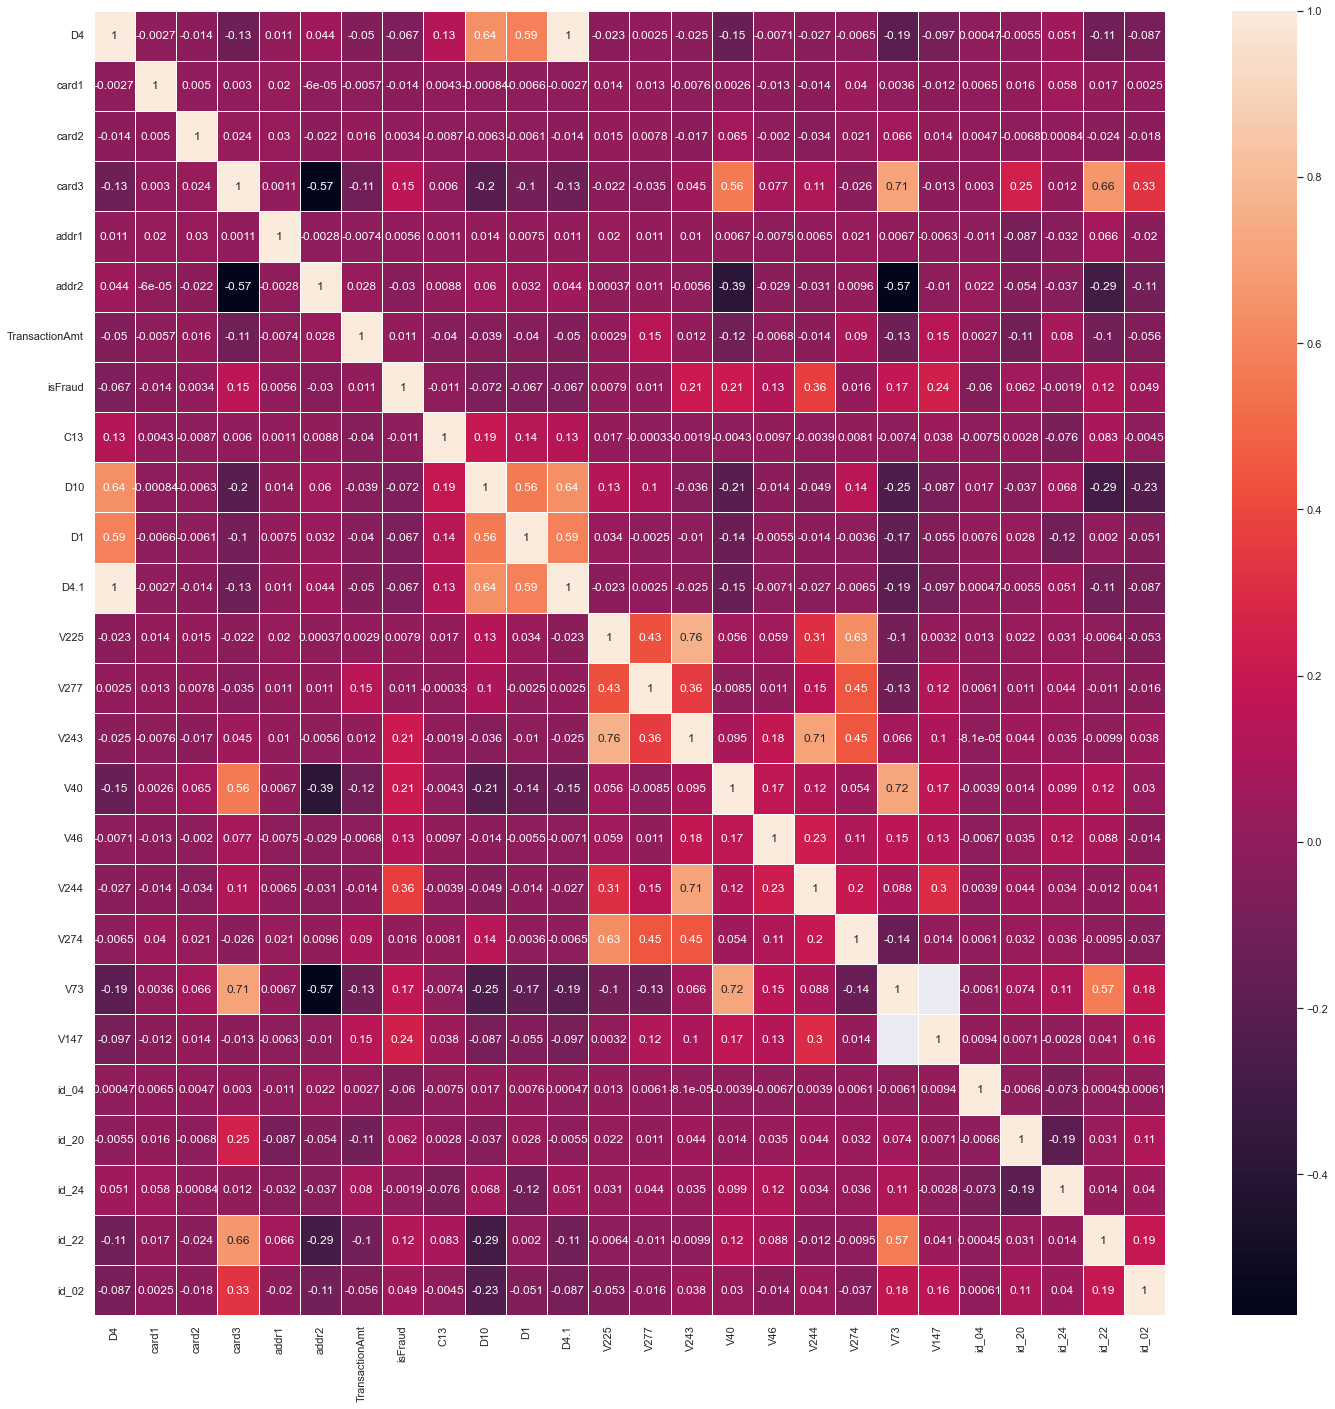

In [8]:
fig, ax = plt.subplots(figsize=(24,24))         # Sample figsize in inches

corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns, annot = True,
            linewidths=.5, 
            ax=ax);

    Найдем все категориальные признаки

In [9]:
cols = df.columns
num_cols = df._get_numeric_data().columns
cols_obj = list(set(cols) - set(num_cols))
cols_obj

['M5', 'id_33', 'id_29']

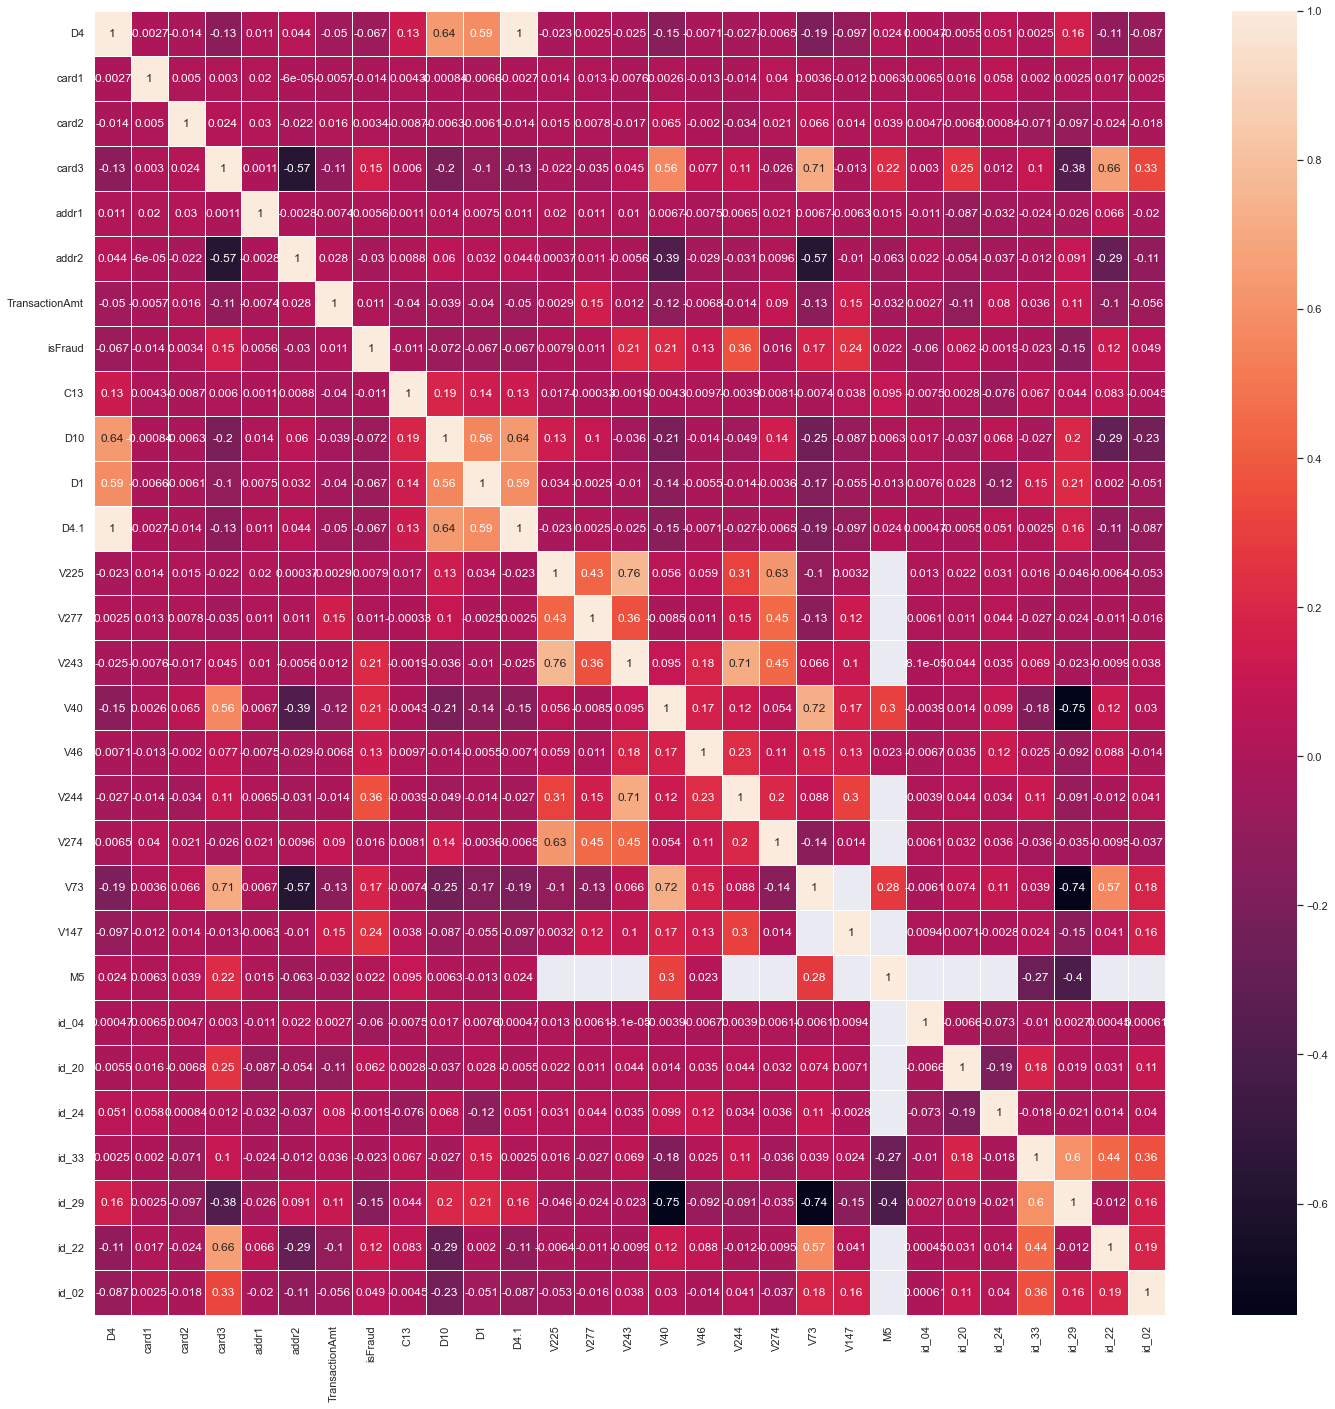

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df_new = df.copy()

for i in cols_obj:
    df_new[i] = label_encoder.fit_transform(df_new[i].tolist())


fig, ax = plt.subplots(figsize=(24,24))         # Sample figsize in inches

corr = df_new.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns, annot = True,
            linewidths=.5, 
            ax=ax);

In [11]:
list_of_col = ['isFraud', 'card3', 'D4', 'D10', 'D1', 'D4.1', 'V243', 'V40', 'V46', 'V244', 'V147', 'V73', 'id_04', 'id_20', 'id_24', 'id_29', 'id_22', 'id_02']
df.drop(df.columns.difference(list_of_col), 1, inplace = True)
df


,D4,card3,isFraud,D10,D1,D4.1,V243,V40,V46,V244,V73,V147,id_04,id_20,id_24,id_29,id_22,id_02
TransactionID,,,,,,,,,,,,,,,,,,
2987000,NaN,150.0,0,13.0,14.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987001,0.0,150.0,0,0.0,0.0,0.0,NaN,0.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987002,0.0,150.0,0,0.0,0.0,0.0,NaN,0.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987003,94.0,150.0,0,84.0,112.0,94.0,NaN,0.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987004,NaN,150.0,0,NaN,0.0,NaN,1.0,NaN,NaN,1.0,NaN,0.0,NaN,144.0,NaN,NotFound,NaN,70787.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3577535,NaN,150.0,0,56.0,29.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3577536,0.0,150.0,0,0.0,0.0,0.0,NaN,0.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3577537,0.0,150.0,0,0.0,0.0,0.0,NaN,0.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


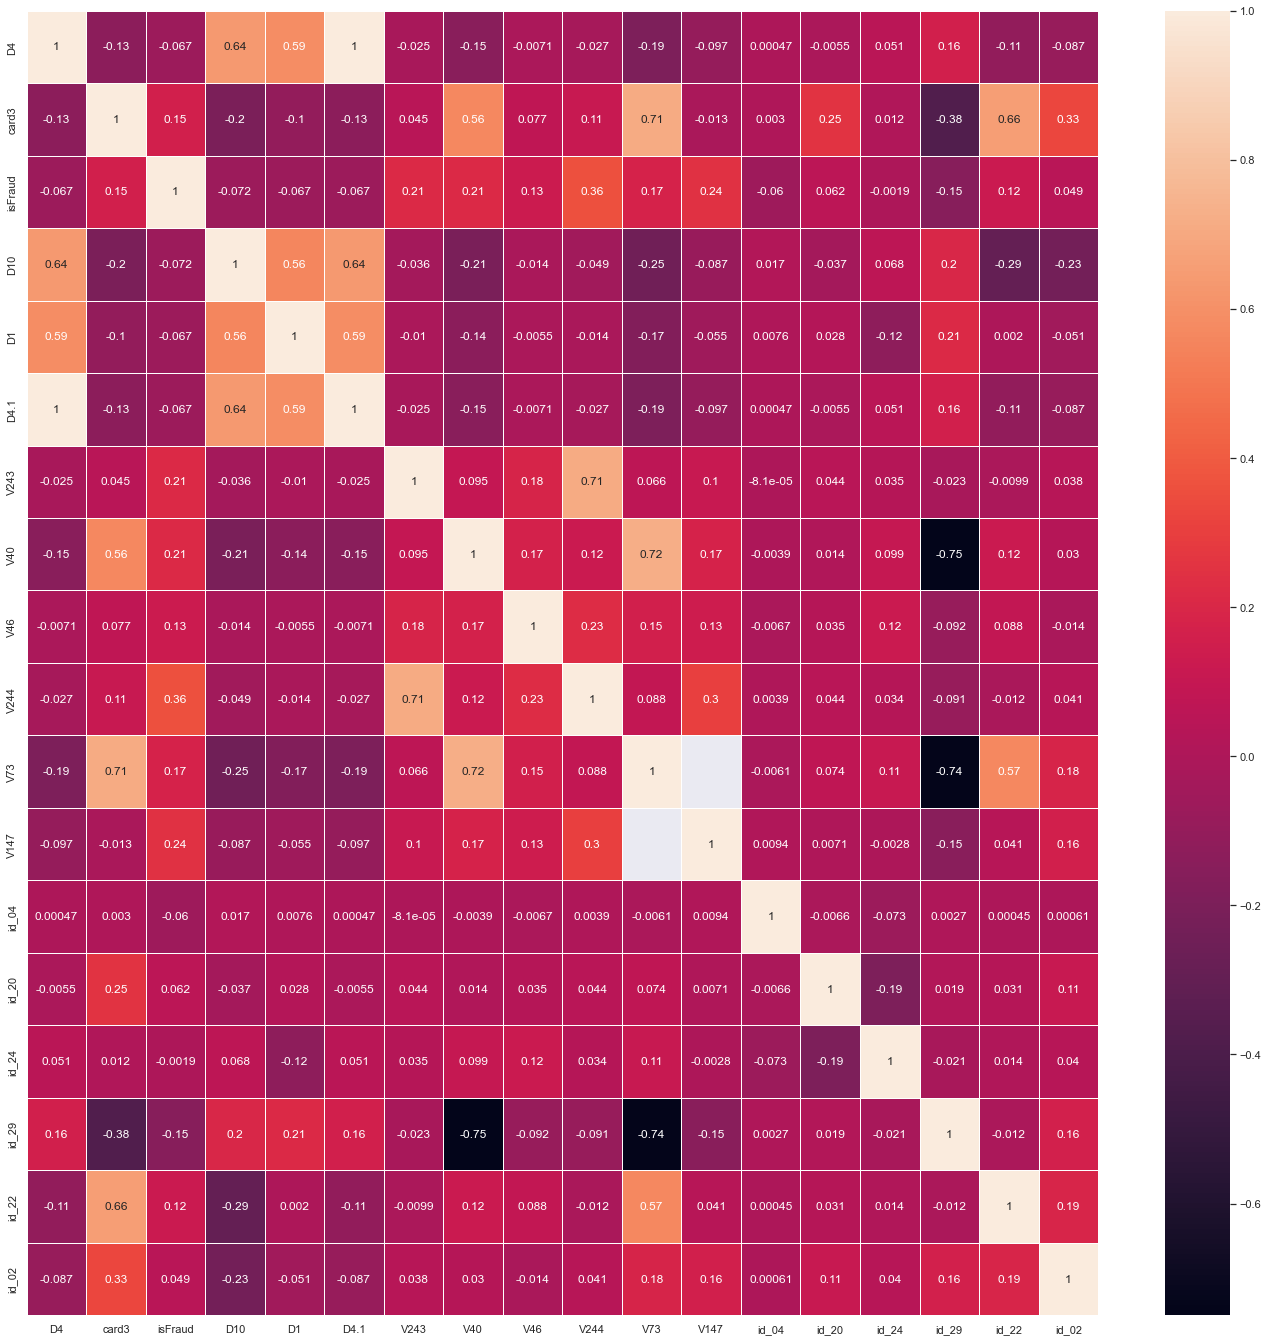

In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df_new = df.copy()

cols_obj = ['id_29']

for i in cols_obj:
    df_new[i] = label_encoder.fit_transform(df_new[i].tolist())


fig, ax = plt.subplots(figsize=(24,24))         # Sample figsize in inches

corr = df_new.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns, annot = True,
            linewidths=.5, 
            ax=ax);

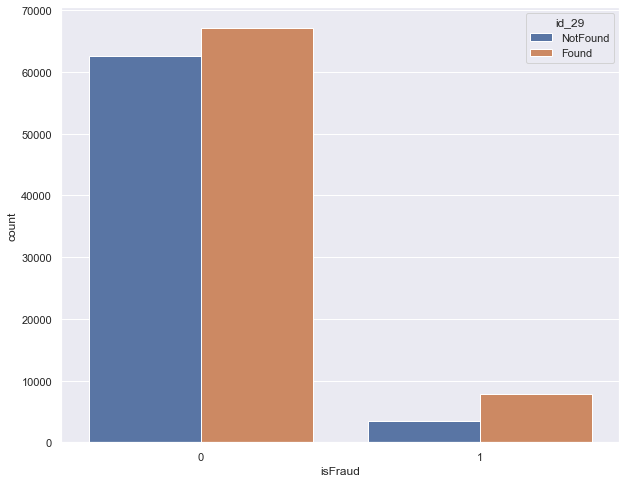

In [13]:
sns.countplot(x='isFraud', hue= 'id_29' ,data = df);

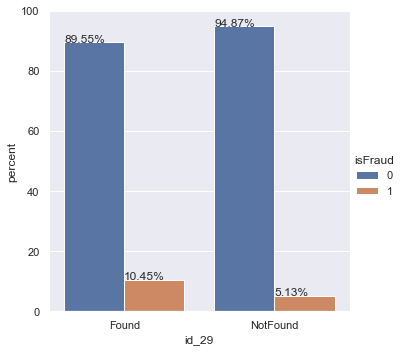

In [14]:
df1 = df.groupby('id_29')['isFraud'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x = 'id_29', y = 'percent', hue = 'isFraud', kind = 'bar', data = df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

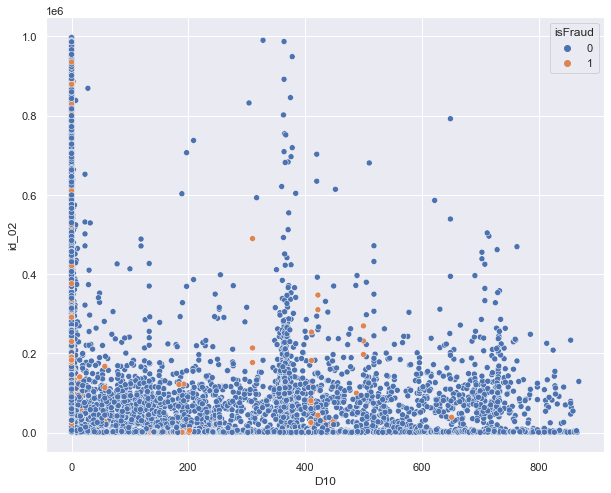

In [15]:
sns.scatterplot(x = 'D10', y = 'id_02', hue = 'isFraud' ,data=df);

    3.Logistic Regression

In [16]:
for i in cols_obj:
    df[i] = label_encoder.fit_transform(df_new[i].tolist())

df

,D4,card3,isFraud,D10,D1,D4.1,V243,V40,V46,V244,V73,V147,id_04,id_20,id_24,id_29,id_22,id_02
TransactionID,,,,,,,,,,,,,,,,,,
2987000,NaN,150.0,0,13.0,14.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2,NaN,NaN
2987001,0.0,150.0,0,0.0,0.0,0.0,NaN,0.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,2,NaN,NaN
2987002,0.0,150.0,0,0.0,0.0,0.0,NaN,0.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,2,NaN,NaN
2987003,94.0,150.0,0,84.0,112.0,94.0,NaN,0.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,2,NaN,NaN
2987004,NaN,150.0,0,NaN,0.0,NaN,1.0,NaN,NaN,1.0,NaN,0.0,NaN,144.0,NaN,1,NaN,70787.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3577535,NaN,150.0,0,56.0,29.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2,NaN,NaN
3577536,0.0,150.0,0,0.0,0.0,0.0,NaN,0.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,2,NaN,NaN
3577537,0.0,150.0,0,0.0,0.0,0.0,NaN,0.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,2,NaN,NaN


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = df.drop(columns = ['isFraud'])
y = df['isFraud']

X.fillna(X.mean(), inplace = True)
y.fillna(y.mean(), inplace = True)

X_1 = scaler.fit_transform(X)
X_1

array([[-3.52040346e-16, -2.82202223e-01, -6.51089806e-01, ...,
         5.24603148e-01,  5.50581396e-15,  3.73241690e-16],
       [-8.67057412e-01, -2.82202223e-01, -7.27355841e-01, ...,
         5.24603148e-01,  5.50581396e-15,  3.73241690e-16],
       [-8.67057412e-01, -2.82202223e-01, -7.27355841e-01, ...,
         5.24603148e-01,  5.50581396e-15,  3.73241690e-16],
       ...,
       [-8.67057412e-01, -2.82202223e-01, -7.27355841e-01, ...,
         5.24603148e-01,  5.50581396e-15,  3.73241690e-16],
       [-7.30807908e-01, -2.82202223e-01, -5.98290244e-01, ...,
         5.24603148e-01,  5.50581396e-15,  3.73241690e-16],
       [-8.60864253e-01, -2.82202223e-01, -7.21489222e-01, ...,
         5.24603148e-01,  5.50581396e-15,  3.73241690e-16]])

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42).fit(X_train, y_train)

In [22]:
from sklearn.metrics import roc_auc_score

y_pred = clf.predict(X_test)
roc_auc_score(y_test, y_pred)

0.5522644804960408

    4.KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = neigh.predict(X_test)
roc_auc_score(y_test, y_pred)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
neigh = KNeighborsClassifier()
neigh_params={'n_neighbors': np.arange(1, 5)}

neigh_grid = GridSearchCV(neigh, neigh_params, cv=kf, scoring='roc_auc', n_jobs = -1)
neigh_grid.fit(X_train, y_train)
print("Найлучшее качество модели при", neigh_grid.best_params_)
print("Наилучшая оценка качества модели:", neigh_grid.best_score_)

    5.Gradient Boosting

In [18]:
from xgboost import XGBClassifier

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ['dlopen(/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']
